In [1]:
import numpy as np
from fenics import *

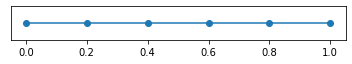

In [2]:
mesh = UnitIntervalMesh(5)
plot(mesh)

In [3]:
V = FunctionSpace(mesh, 'CG', 1)
print ('Number of dofs', V.dim())

Number of dofs 6


In [4]:
f = Function(V)
f.vector()[:]

array([ 0.,  0.,  0.,  0.,  0.,  0.])

f.vector()[:]= [ 0.  0.  0.  1.  0.  0.]


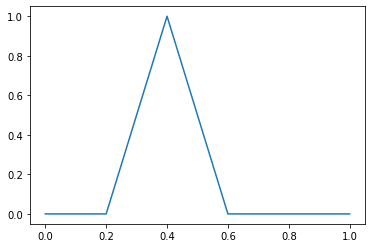

In [5]:
f.vector()[3] = 1.0
print('f.vector()[:]=', f.vector()[:])
plot(f)

f.vector()[:]= [ 0.   1.5  0.   1.   0.   0. ]


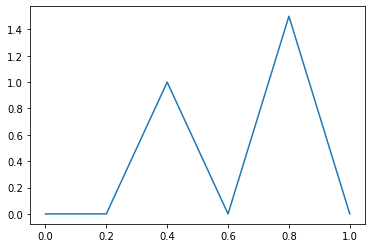

In [6]:
f.vector()[1] = 1.5
print('f.vector()[:]=', f.vector()[:])
plot(f)

In [7]:
V.tabulate_dof_coordinates()

array([[ 1. ],
       [ 0.8],
       [ 0.6],
       [ 0.4],
       [ 0.2],
       [ 0. ]])

Let's solve $$\begin{cases}
\Delta u = f & \text{in } (0,1), \\
u(0) = 10 \\
u(1) = 3
\end{cases}$$

Stiffness form
$$k(u,v) = \int_\Omega \nabla u \cdot \nabla v dx$$

In [8]:
u_trial = TrialFunction(V)
v_test = TestFunction(V)

stiffness_form = inner(grad(u_trial), grad(v_test)) * dx

print('u_trial=', u_trial)
print('v_test=', v_test)
print('stiffness_form=', stiffness_form)

u_trial= v_1
v_test= v_0
stiffness_form= { conj(((grad(v_0)) : (grad(v_1)))) } * dx(<Mesh #0>[everywhere], {})


Stiffness matrix (ignoring boundary conditions)
$$K_{ij} = k(\phi_i, \phi_j), \quad i=1,\dots,n, \quad, j=1,\dots,n$$

In [9]:
K = assemble(stiffness_form)
K.array()

array([[  5.,  -5.,   0.,   0.,   0.,   0.],
       [ -5.,  10.,  -5.,   0.,   0.,   0.],
       [  0.,  -5.,  10.,  -5.,   0.,   0.],
       [  0.,   0.,  -5.,  10.,  -5.,   0.],
       [  0.,   0.,   0.,  -5.,  10.,  -5.],
       [  0.,   0.,   0.,   0.,  -5.,   5.]])

Right hand side form
$$rhs(v) = \int_\Omega f v dx$$

In [10]:
rhs_form = f * v_test * dx
print('rhs_form=', rhs_form)

rhs_form= { v_0 * f_5 } * dx(<Mesh #0>[everywhere], {})


Right hand side vector

$$b_i = \int_\Omega f \phi_i dx, \quad i=1,\dots,n$$

In [11]:
b = assemble(rhs_form)
b[:]

array([ 0.05      ,  0.2       ,  0.08333333,  0.13333333,  0.03333333,  0.        ])

Dirichlet boundary conditions: 
$$u(0) = 10, \quad u(1) = 3$$

In [12]:
def left_boundary(x, on_boundary):
    if on_boundary and np.abs(x - 0.0) < 1e-8:
        return True
    else:
        return False

u_D_left = Expression('10.0', degree=2)
    
def right_boundary(x, on_boundary):
    if on_boundary and np.abs(x - 1.0) < 1e-8:
        return True
    else:
        return False
    
u_D_right = Expression('3.0', degree=2)
    
bc_left = DirichletBC(V, u_D_left, left_boundary)
bc_right = DirichletBC(V, u_D_right, right_boundary)
bcs = [bc_left, bc_right]

Assembled stiffness matrix and right hand side vector including boundary conditions, for
$$K u = b$$

In [13]:
K_with_bc, F_with_bc = assemble_system(stiffness_form, rhs_form, bcs)

print(K_with_bc.array())
print(F_with_bc[:])

[[  1.   0.   0.   0.   0.   0.]
 [  0.  10.  -5.   0.   0.   0.]
 [  0.  -5.  10.  -5.   0.   0.]
 [  0.   0.  -5.  10.  -5.   0.]
 [  0.   0.   0.  -5.  10.   0.]
 [  0.   0.   0.   0.   0.   1.]]
[  3.          15.2          0.08333333   0.13333333  50.03333333  10.        ]


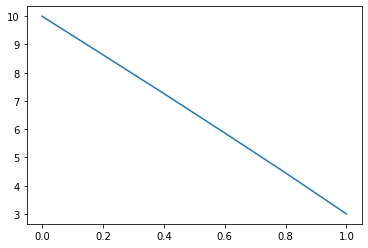

In [14]:
u_solution = Function(V)

solve(stiffness_form == rhs_form, u_solution, bcs)

plot(u_solution)

Hmm, source is weak. Let's increase the magnitude of the source term

In [15]:
f.vector()[:] = 1000*f.vector()

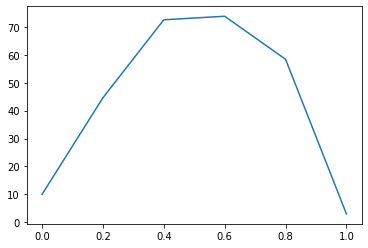

In [16]:
u_solution = Function(V)

solve(stiffness_form == rhs_form, u_solution, bcs)

plot(u_solution)